# Recurrent Network Long Distances

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3)
  Y.append(y)

X = np.asarray(X) 
Y = np.asarray(Y)
N = len(X)

In [3]:
print(Y)

[0 0 1 ... 1 1 0]


In [4]:
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.01),
    metrics = ['accuracy'],
)

r = model.fit(
    X, Y,
    epochs=100,
    validation_split = 0.5,)

Epoch 1/100
79/79 [==============================] - 1s 9ms/step - loss: 0.7993 - accuracy: 0.4976 - val_loss: 0.7205 - val_accuracy: 0.4972
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.5120 - val_loss: 0.6962 - val_accuracy: 0.4904
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5180 - val_loss: 0.6959 - val_accuracy: 0.4888
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5148 - val_loss: 0.6965 - val_accuracy: 0.4996
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5176 - val_loss: 0.6956 - val_accuracy: 0.4984
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5184 - val_loss: 0.6947 - val_accuracy: 0.5032
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5164 - val_loss: 0.6958 - val_accuracy: 0.4936
Epoch 8/100
7

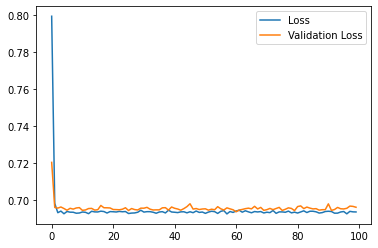

In [5]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

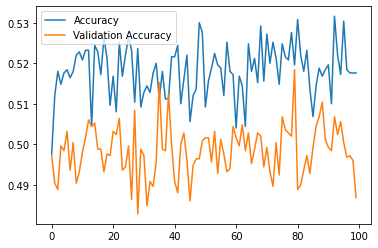

In [6]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

In [7]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T,D))
# Method 1:
#x = LSTM(5)(i)
x = SimpleRNN(5)(i)
#x = GRU(5)(i)

# Method 2:
#x = LSTM(5, return_sequences = True)(i)
#x = GlobalMaxPool1D()(x)

x = Dense(1, activation ='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.01),
    metrics = ['accuracy'],
)
r = model.fit(
    inputs, Y, 
    epochs = 200, 
    validation_split = 0.5
)

Epoch 1/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6797 - accuracy: 0.5720 - val_loss: 0.6546 - val_accuracy: 0.6368
Epoch 2/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6382 - accuracy: 0.6864 - val_loss: 0.6176 - val_accuracy: 0.6952
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.5960 - accuracy: 0.7360 - val_loss: 0.5758 - val_accuracy: 0.7404
Epoch 4/200
79/79 [==============================] - 1s 15ms/step - loss: 0.5517 - accuracy: 0.7644 - val_loss: 0.5165 - val_accuracy: 0.7828
Epoch 5/200
79/79 [==============================] - 1s 16ms/step - loss: 0.4892 - accuracy: 0.8016 - val_loss: 0.4489 - val_accuracy: 0.8360
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.4290 - accuracy: 0.8428 - val_loss: 0.3890 - val_accuracy: 0.8744
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.3746 - accuracy: 0.8652 - val_loss: 0.3320 - val_accuracy: 0.8980
Epoch 

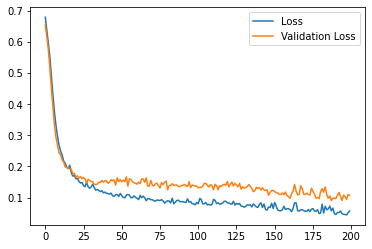

In [8]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

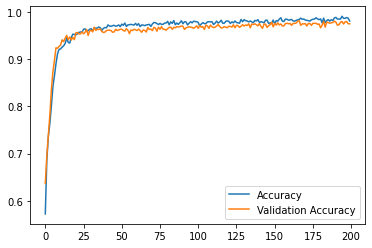

In [9]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

In [15]:
T = 30
X = []
Y = []
for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.asarray(X) 
Y = np.asarray(Y)
N = len(X)

In [16]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T,D))
# Method 1:
#x = LSTM(5)(i)
#x = SimpleRNN(5)(i)
#x = GRU(5)(i)

# Method 2:
x = LSTM(5, return_sequences = True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation ='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr = 0.01),
    metrics = ['accuracy'],
)
r = model.fit(
    inputs, Y, 
    epochs = 200, 
    validation_split = 0.5
)

Epoch 1/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6959 - accuracy: 0.5052 - val_loss: 0.6947 - val_accuracy: 0.5104
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6929 - val_accuracy: 0.5108
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5172 - val_loss: 0.6938 - val_accuracy: 0.5104
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6934 - val_accuracy: 0.5104
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5152 - val_loss: 0.6935 - val_accuracy: 0.5104
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5144 - val_loss: 0.6930 - val_accuracy: 0.5096
Epoch 7/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6939 - val_accuracy: 0.5104
Epoch 

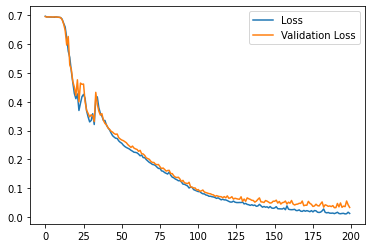

In [17]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

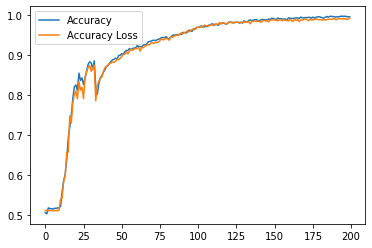

In [18]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Accuracy Loss')
plt.legend()